<a href="https://colab.research.google.com/github/Christian-Young/AI-Machine-Learning/blob/master/HW_2/HW2_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2

Extend the code for mini-batch gradient descent in the notebook linear_regression_simple_numpy_implementation.ipynb to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

#The intention of this problem is to extend the code from the linear_regression_simple_numpy_implementation.ipynb notebook provided by Dr. Wocjan for the n = 2 case. [Linear Regression Simple Numpy Implementation](https://colab.research.google.com/drive/1uTmcJIOPnQgRtRRJt0cndOm4t5IIjsc6)

### Generate random data

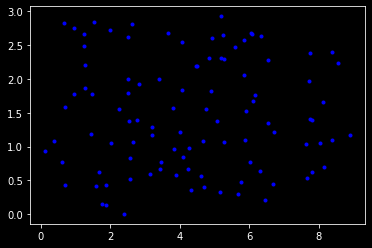

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

x = 9 * np.random.rand(100, 1)
y = 3 * np.random.rand(100, 1)
z = x + y
plt.style.use('dark_background')
plt.plot(x, y, "b.")
plt.show()

###Set parameters (epoch, learning rate, batch size) and begin training with gradient descent

In [0]:
epochs = 50
lr = 0.01
batch = 5
wt = np.random.randn(3, 1)
weightPath = []
weightPath.append(wt)
arr = np.column_stack([np.ones((100, 1)), x, y])

for epoch in range(epochs):
  indices = np.random.permutation(100)
  xS = arr[indices]
  yS = y[indices]
  for i in range(0, 100, batch):
    x_i = xS[i: i + batch]
    y_i = yS[i: i + batch]
    batchDot = batch * x_i.T.dot(x_i.dot(wt) - y_i)
    gradient = 1 / batchDot
    wt = wt - (lr * gradient)
    weightPath.append(wt)

###Make predictions

In [0]:
arr = np.array([[1], [5], [15]])
arr2 = np.column_stack([np.ones((3, 1)), arr])
xPred = 9 * np.random.rand(100 ,1)
yPred = 3 * np.random.rand(100, 1)
zPred = xPred + yPred
val = np.column_stack([np.ones((100, 1)), xPred, yPred])
zPred2 = val.dot(wt)

###Visualize predictions

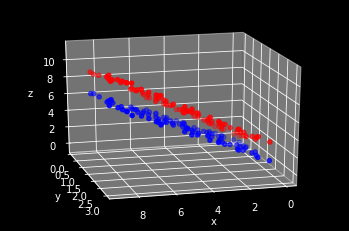

In [0]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xPred, yPred, zPred, c = 'red')
ax.scatter(xPred, yPred, zPred2, c = 'blue')
ax.view_init(20, 75)